In [63]:
%pip install --upgrade pip  
%pip install pandas
%pip install matplotlib
%pip install xlsxwriter
%pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [64]:
names = ['R_2024_10_02_25mm.txt',
        'R_2024_10_03_50mm.txt',
        'R30_2024_10_02_25mm.txt',
        'R30_2024_10_03_50mm.txt']


In [65]:
dictoinaries = []
for j in range(4):
    with open(names[j], encoding="UTF-8") as f:
        strs=[str.rstrip('\n').split(';') for str in f]

        name_of_coms = strs[0]
        numbers = strs[1:]
        dictoinary = {}
        for i in range(len(name_of_coms)):
            for number in numbers:
                dictoinary[name_of_coms[i]] = dictoinary.get(name_of_coms[i],[])+[float(number[i])]
        dictoinaries.append(dictoinary)
        print

In [66]:
df_names = ['Standard force', 'Strain', 'Nominal strain']


ДЛЯ ФАЙЛА R_2024_10_02_25mm.txt


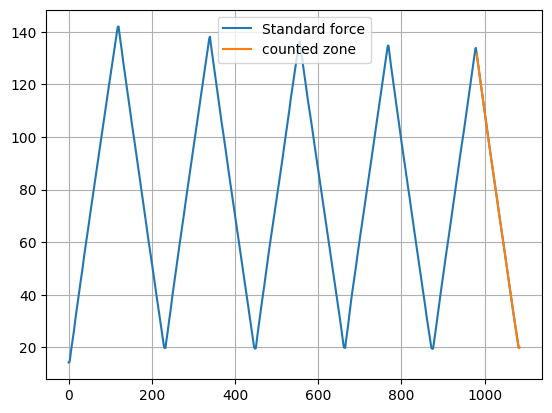

Standard force: 64.78590704545455


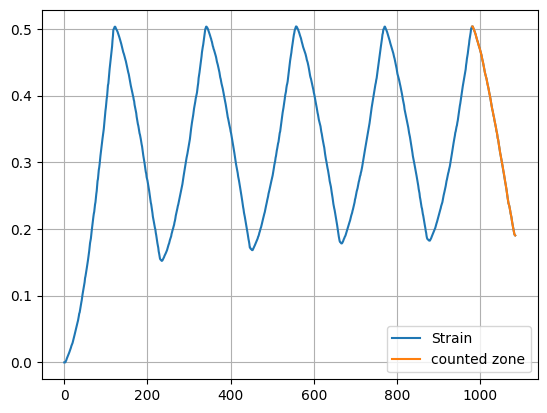

Strain: 0.33710959090909093


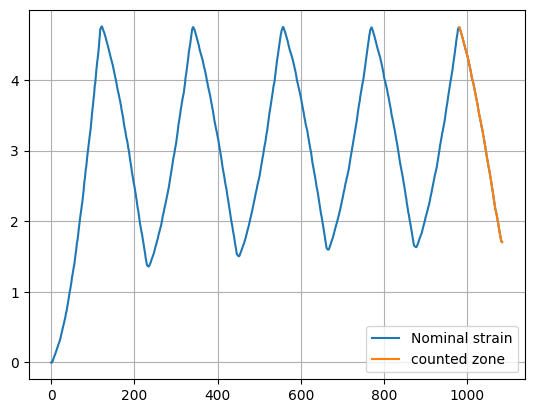

Nominal strain: 3.110414784090909
ДЛЯ ФАЙЛА R_2024_10_03_50mm.txt


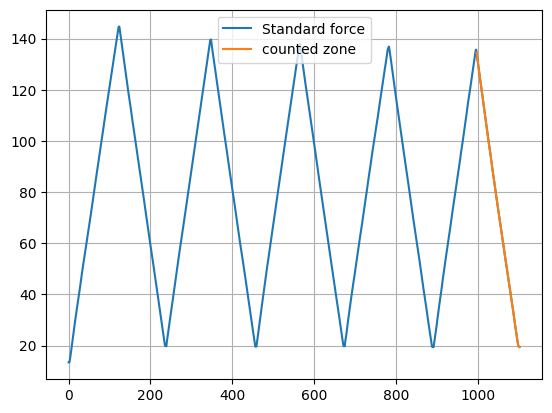

Standard force: 64.67379966292135


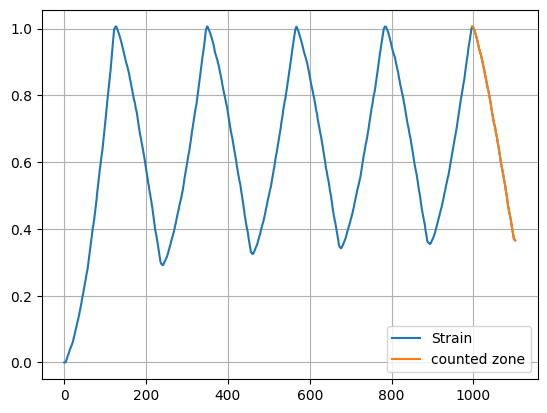

Strain: 0.6599428966292135


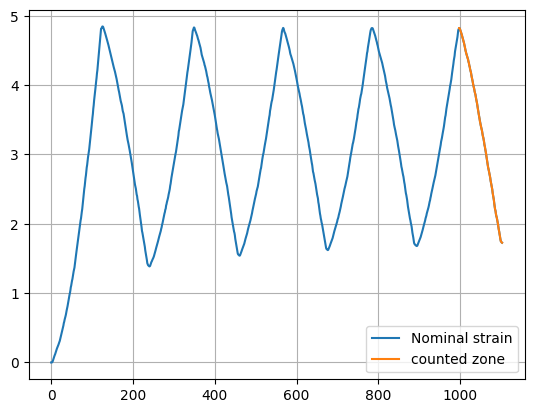

Nominal strain: 3.1345202921348307
ДЛЯ ФАЙЛА R30_2024_10_02_25mm.txt


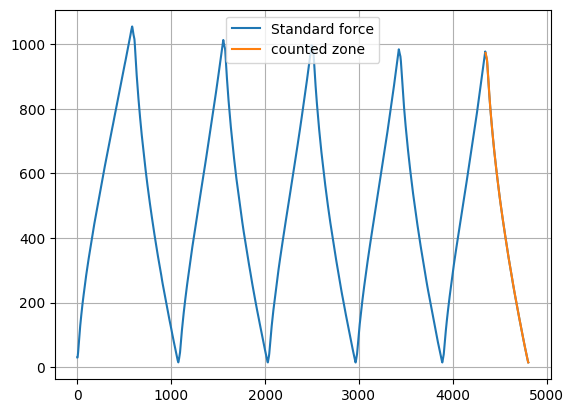

Standard force: 326.71445090909094


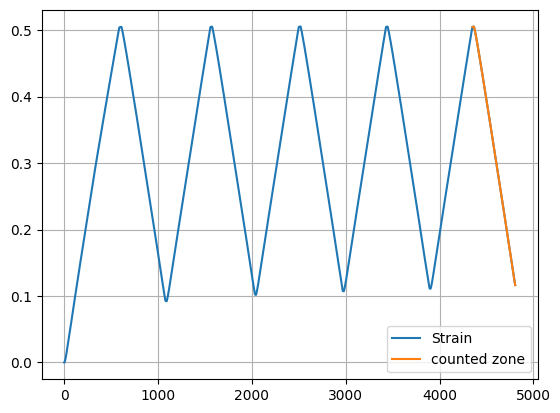

Strain: 0.29154183766233766


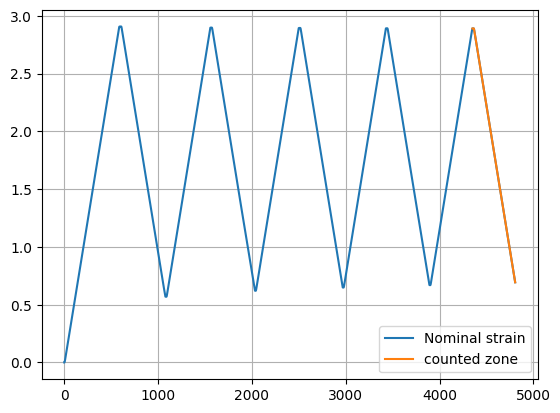

Nominal strain: 1.6535325205194806
ДЛЯ ФАЙЛА R30_2024_10_03_50mm.txt


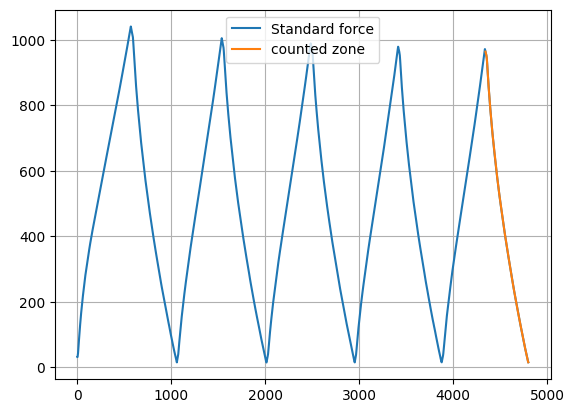

Standard force: 322.1764962077922


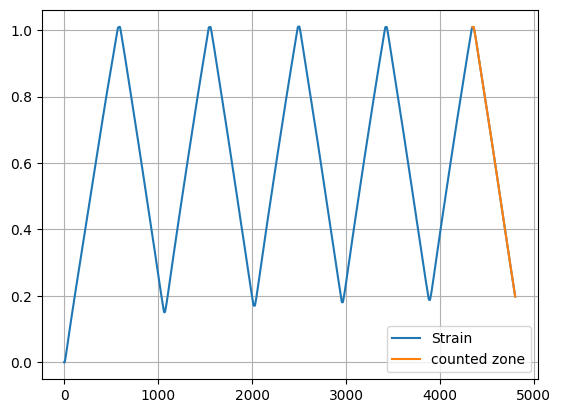

Strain: 0.5571836418181818


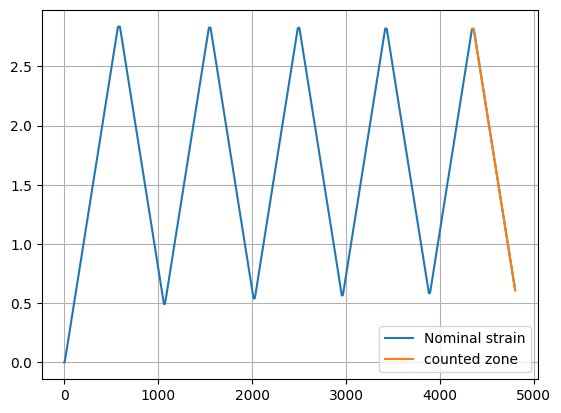

Nominal strain: 1.5699154618181819


In [67]:
mn_string = ""
for i in range(4):
    print("ДЛЯ ФАЙЛА", names[i])
    mn_string += names[i]
    mn_string+=":\n"
    df=pd.DataFrame(dictoinaries[i])
    for name in df_names:
        force = df[name]

        plt.plot(force, label=name)
        plt.plot(force[-len(force)//10 + len(force)//200:], label="counted zone")
        plt.legend()
        plt.grid()
        plt.show()
        mn = np.mean(df[name][-len(force)//10 + len(force)//50:])
        print(f"{name}: {mn}")
        mn_string += f"{name}: {mn}\n"
    mn_string+="---------------------------------\n"

ПОДСЧЁТ ДАННЫХ
Задача сравнительно проста --- найти линейный участок зависимости сил от деформации, перевести силы в напряжения (поделить на площадь), а деформации в скорость деформации (поделить на начальную длину балки), после чего найти модель юнга (тангенс угла наклона в графике sigma--epsilon)

ДЛЯ ФАЙЛА    R_2024_10_02_25mm.txt
    delta напряж:         0.240600
    delta eps:            0.009624
    delta силы:           71.299290
    delta sigma:          0.380872
    мод. Юнга:            39.575257


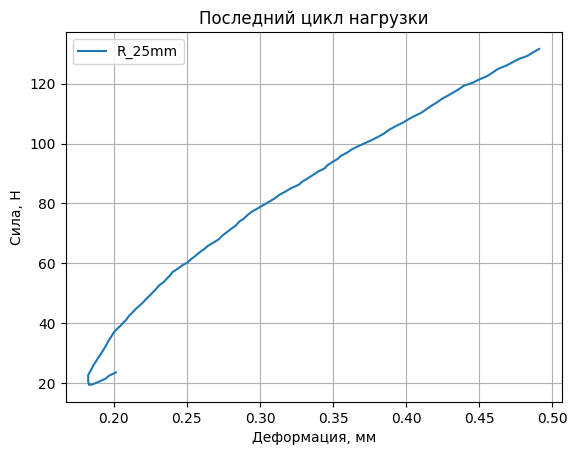

ДЛЯ ФАЙЛА    R_2024_10_03_50mm.txt
    delta напряж:         0.370500
    delta eps:            0.007410
    delta силы:           52.317980
    delta sigma:          0.279476
    мод. Юнга:            37.716112


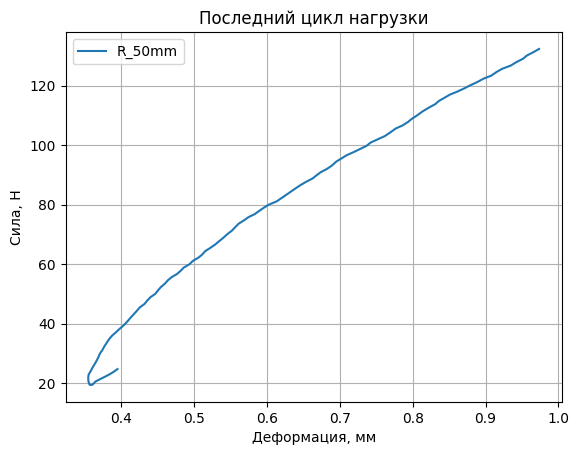

ДЛЯ ФАЙЛА    R30_2024_10_02_25mm.txt
    delta напряж:         0.323400
    delta eps:            0.012936
    delta силы:           716.268700
    delta sigma:          4.263504
    мод. Юнга:            329.584428


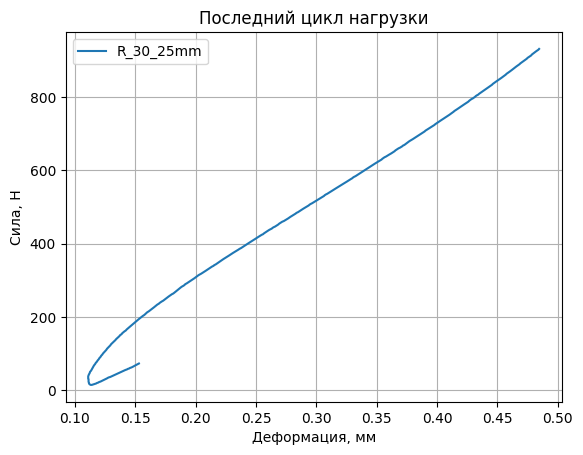

ДЛЯ ФАЙЛА    R30_2024_10_03_50mm.txt
    delta напряж:         0.672600
    delta eps:            0.013452
    delta силы:           721.981600
    delta sigma:          4.297510
    мод. Юнга:            319.469979


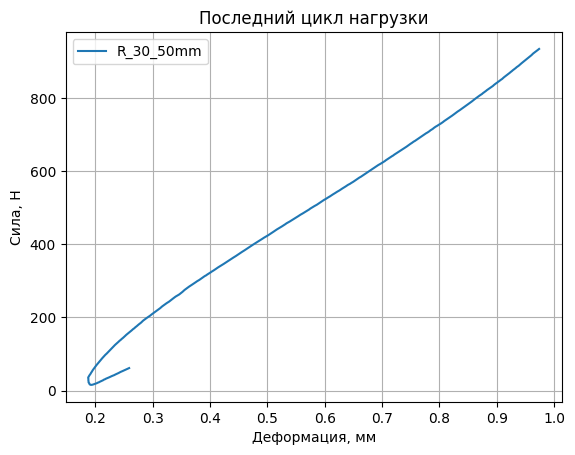

In [68]:
start = [0.25, 0.6,0.16, 0.3]
base =  [25, 50, 25, 50]
size =  [187.2, 187.2, 168, 168]

with open('E_module.txt', 'w', encoding='UTF-8') as f:
    with pd.ExcelWriter('Results.xlsx') as writer:
        for i in range(4):      
            name_of_fig = 'R_'
            if i > 1:
                name_of_fig+="30_"
            name_of_fig+=names[i][-8:-4]

            df=pd.DataFrame(dictoinaries[i])
            l_std=len(df["Standard force"])
            left=l_std // 5 
            right = l_std // 10 
            strain = df['Strain'][-left:-right]
            force = df['Standard force'][-left:-right]
            
            delta_strain = max(strain) - min(df['Strain'][-left:-right][df['Strain']>start[i]]) 
            delta_eps =  delta_strain / base[i]   
            delta_force = max(force) - min(df['Standard force'][-left:-right][df['Strain'] > start[i]])
            delta_sigma =  delta_force / size[i]

            string = f'''ДЛЯ ФАЙЛА    {{0}}
    delta напряж:         {delta_strain:.6f}
    delta eps:            {delta_eps:.6f}
    delta силы:           {delta_force:.6f}
    delta sigma:          {delta_sigma:.6f}
    мод. Юнга:            {delta_sigma / delta_eps:.6f}'''.format(names[i])
            
            print(string)
            
            plt.plot(strain, force, label=name_of_fig)
            plt.xlabel('Деформация, мм')
            plt.ylabel('Сила, Н')
            plt.title('Последний цикл нагрузки')
            
            plt.legend()
            plt.grid()
            plt.savefig(name_of_fig)
            plt.show()

            f.write(string + '\n')
            line_str = ''.join('=' for _ in range(35))
            f.write(line_str + '\n')    

            dict_2={'delta strain': f'{delta_strain:.6f}',
            'delta eps':            f'{delta_eps:.6f}',
            'delta force':          f'{delta_force:.6f}',
            'delta sigma':          f'{delta_sigma:.6f}',
            'E':                    f'{delta_sigma / delta_eps:.6f}'}
            df_res = pd.Series(dict_2) 
            df.to_excel(writer, index=False, sheet_name=name_of_fig)

    

ДЛЯ ФАЙЛА    R_2024_10_02_25mm.txt
delta strain:         0.240600
delta eps:         0.009624
delta force:         71.299290
delta sigma:         0.380872
        tan:         39.575257


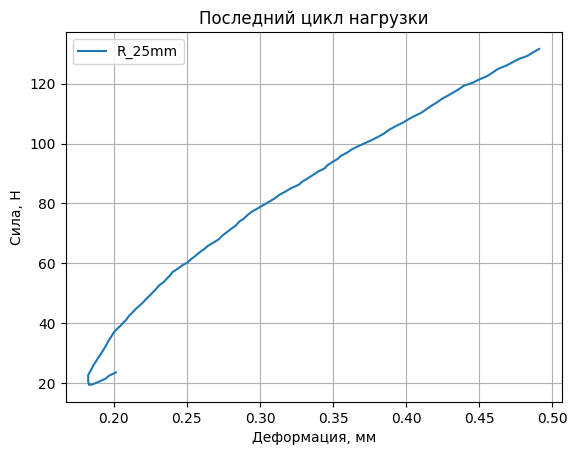

ДЛЯ ФАЙЛА    R_2024_10_03_50mm.txt
delta strain:         0.370500
delta eps:         0.007410
delta force:         52.317980
delta sigma:         0.279476
        tan:         37.716112


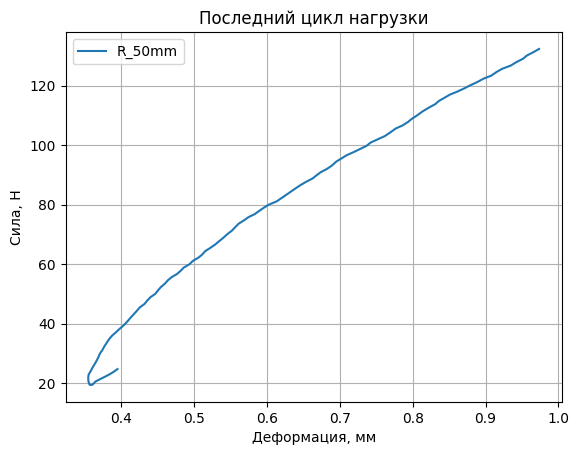

ДЛЯ ФАЙЛА    R30_2024_10_02_25mm.txt
delta strain:         0.323400
delta eps:         0.012936
delta force:         716.268700
delta sigma:         4.263504
        tan:         329.584428


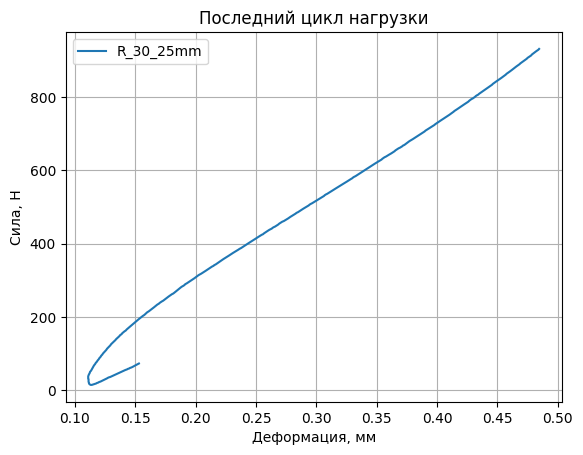

ДЛЯ ФАЙЛА    R30_2024_10_03_50mm.txt
delta strain:         0.672600
delta eps:         0.013452
delta force:         721.981600
delta sigma:         4.297510
        tan:         319.469979


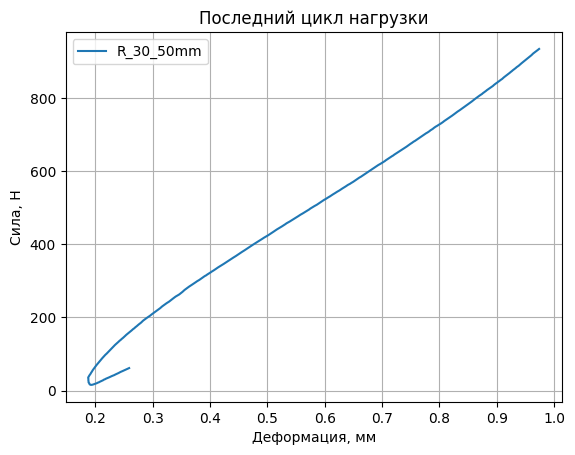

In [69]:
start = [0.25, 0.6,0.16, 0.3]
base =  [25, 50, 25, 50]
size =  [187.2, 187.2, 168, 168]

with open('E_module.txt', 'w', encoding='UTF-8') as f:

    for i in range(4):      
        name_of_fig = 'R_'
        if i > 1:
            name_of_fig+="30_"
        name_of_fig+=names[i][-8:-4]

        df=pd.DataFrame(dictoinaries[i])
        l_std=len(df["Standard force"])
        left=l_std // 5 
        right = l_std // 10 
        strain = df['Strain'][-left:-right]
        force = df['Standard force'][-left:-right]
        
        delta_strain = max(strain) - min(df['Strain'][-left:-right][df['Strain']>start[i]]) 
        delta_eps =  delta_strain / base[i]   
        delta_force = max(force) - min(df['Standard force'][-left:-right][df['Strain'] > start[i]])
        delta_sigma =  delta_force / size[i]

        string = f'''ДЛЯ ФАЙЛА    {{0}}
delta strain:         {delta_strain:.6f}
delta eps:         {delta_eps:.6f}
delta force:         {delta_force:.6f}
delta sigma:         {delta_sigma:.6f}
        tan:         {delta_sigma / delta_eps:.6f}'''.format(names[i])
        
        print(string)
        
        plt.plot(strain, force, label=name_of_fig)
        plt.xlabel('Деформация, мм')
        plt.ylabel('Сила, Н')
        plt.title('Последний цикл нагрузки')
        
        plt.legend()
        plt.grid()
        plt.savefig(name_of_fig)
        plt.show()

        f.write(string + '\n')
        line_str = ''.join('=' for _ in range(35))
        f.write(line_str + '\n')    

        dict_2={'delta strain': f'{delta_strain:.6f}',
        'delta eps':            f'{delta_eps:.6f}',
        'delta force':          f'{delta_force:.6f}',
        'delta sigma':          f'{delta_sigma:.6f}',
        'E':                    f'{delta_sigma / delta_eps:.6f}'}
        df_res = pd.Series(dict_2) 


In [70]:
import os, sys
os.system('mkdir Results')

0

In [71]:
os.system("move E_module.txt Results")

0

In [72]:
for i in range(4):      
    name_of_fig = 'R_'
    if i > 1:
        name_of_fig+="30_"
    name_of_fig+=names[i][-8:-4]
    os.system('move ' + name_of_fig + ".png Results")